<a href="https://colab.research.google.com/github/RafaelSdeSouza/astrostats-2025/blob/main/Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook showcase a simple regression example and how the use of multilayer perceptrons can approximate a general class of functions.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import scipy.linalg
from sklearn import linear_model

### Linear Regression

#### Example: fitting a line

Simulate a dataset:

In [ ]:
np.random.seed(0)
X = np.linspace(-10, 10, 400)
y_true = 3 * X + 7
X_reshaped = X.reshape(-1, 1)
y = y_true + np.random.normal(0, 5, len(X))  # adding noise

The `LinearRegression` function solves the [linear least squares problem](https://en.wikipedia.org/wiki/Linear_least_squares_%28mathematics%29) by minimizing sum of squared residuals
$$
S \equiv \sum_{i=1}^N \left| Y_i - (X W)_i \right|^2
$$
with respect to the model parameters (elements of $W$), where $i$ indexes the $N$ samples in the dataset. The syntax will be familiar from the sklearn functions we used earlier:

In [ ]:
fit = linear_model.LinearRegression(fit_intercept=True).fit(X_reshaped, y)

Note that `LinearRegression` will automatically calculate and subtract any non-zero mean of $y$ when `fit_intercept` is `True`.

The resulting $W$ matrix has only a single element, the slope of the line (which is assumed to pass through the origin):

In [ ]:
W = fit.coef_
y0 = fit.intercept_

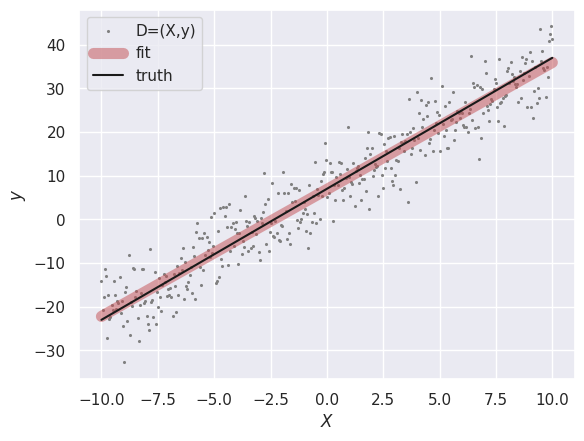

In [ ]:
plt.scatter(X, y, label='D=(X,y)', lw=0, s=5, c='gray')
plt.plot(X, X * W + y0, 'r-', lw=8, alpha=0.5, label='fit')  # modified from X.dot(W) to X * W for 1D array
plt.plot(X, y_true, 'k-', label='truth')
plt.legend()
plt.xlabel('$X$')
plt.ylabel('$y$')
plt.show()


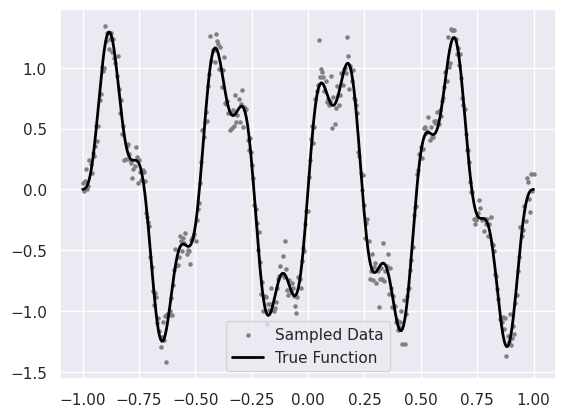

In [ ]:
# Generate the data
np.random.seed(42)
X = np.linspace(-1, 1, 400).reshape(-1, 1)
y_true = np.sin(4 * np.pi * X) + 0.3 * np.sin(13 * np.pi * X)
y = y_true + 0.1 * np.random.randn(X.shape[0], 1)

plt.scatter(X, y, s=5, color='gray', label='Sampled Data')
plt.plot(X, y_true, color='black', linewidth=2, label='True Function')
plt.legend()
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
# Define and train the MLP
#mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', max_iter=10000, alpha=0.001, solver='adam')
mlp = MLPRegressor(hidden_layer_sizes=(250,100), activation='relu', max_iter=10000, alpha=0.0001, solver='adam')
mlp.fit(X, y.ravel())

# Predictions
y_pred = mlp.predict(X)


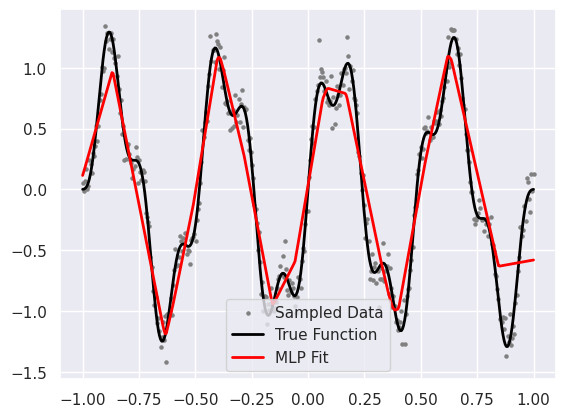

Mean Squared Error: 0.0712


In [ ]:
# Plot
plt.scatter(X, y, s=5, color='gray', label='Sampled Data')
plt.plot(X, y_true, color='black', linewidth=2, label='True Function')
plt.plot(X, y_pred, color='red', linewidth=2, label='MLP Fit')
plt.legend()
plt.show()

# Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

## Exercise:

* Modify the number of hidden layers and neurons. How do these changes affect the model's performance and its ability to capture the underlying pattern?

* The model above uses the 'relu' activation function. Let students experiment with other activation functions such as tanh and logistic. How do these changes affect the output?

## Fit the dataset below

* Fit the data with an MLP.
* Tune hyperparameters.
* Experiment with different activation functions and regularization.
* Use early stopping and different learning rates (example *MLPRegressor(learning_rate_init=0.01, max_iter=10000)*)


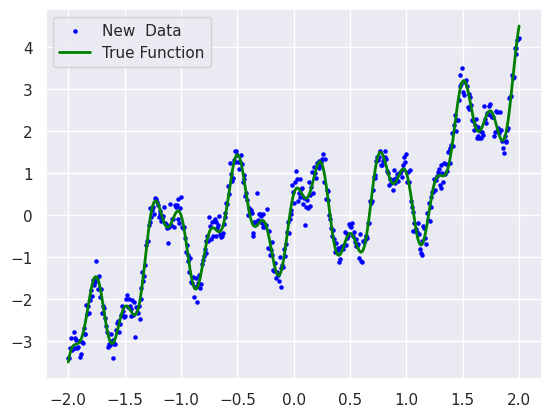

In [ ]:
np.random.seed(42)
X_new = np.linspace(-2, 2, 500).reshape(-1, 1)
y_true_new = np.sin(3 * np.pi * X_new) + 0.5 * np.cos(8 * np.pi * X_new) + 0.5 * X_new**3
y_new = y_true_new + 0.2 * np.random.randn(X_new.shape[0], 1)

# Plot the new data
plt.scatter(X_new, y_new, s=5, color='blue', label='New  Data')
plt.plot(X_new, y_true_new, color='green', linewidth=2, label='True Function')
plt.legend()
plt.show()